# Exercise

## Import relevant libraries

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Explore the descriptive statistics of the variables

In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [6]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [7]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data.dropna(axis=0) #data no mv means no missing values

In [10]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the PDFs

<AxesSubplot: xlabel='Price', ylabel='Count'>

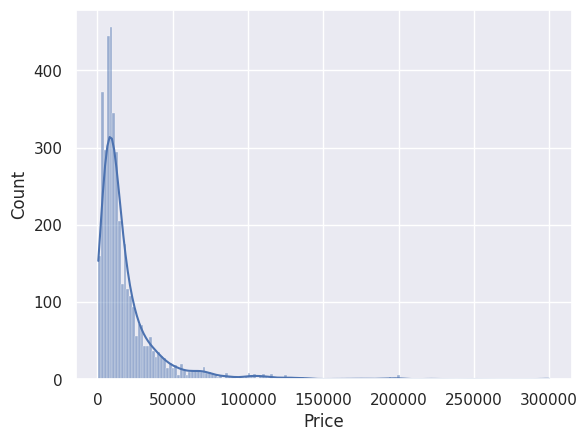

In [11]:
sns.histplot(data_no_mv['Price'], kde=True)

## Dealing with outliers

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot: xlabel='Price', ylabel='Count'>

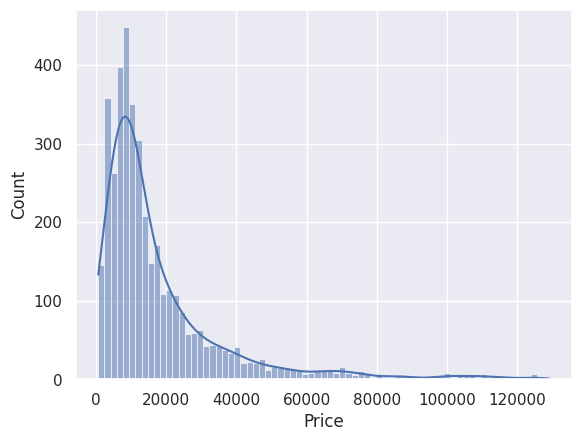

In [13]:
sns.histplot(data_1['Price'], kde=True)

<AxesSubplot: xlabel='Mileage', ylabel='Count'>

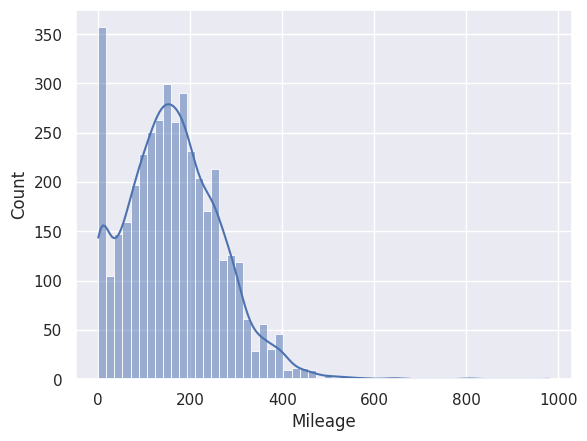

In [14]:
sns.histplot(data_no_mv['Mileage'], kde=True)

idhar dekh sakta ho line ghisati hui jaari ha sabse phle vala graph ki tarah 600,800,1000 vali line pa najar dalo 
isa bhi same tarika se solve kar sakta ha jaise upar kiya

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot: xlabel='Mileage', ylabel='Count'>

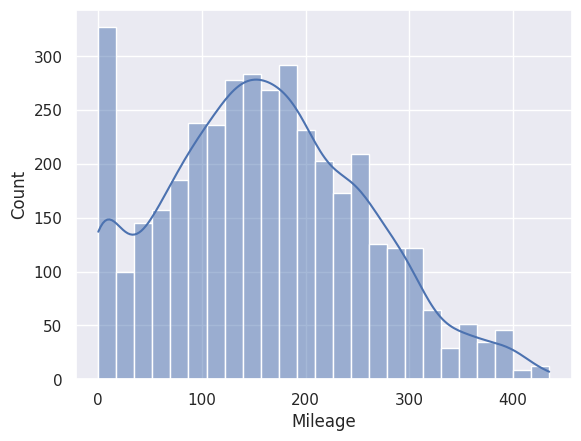

In [16]:
sns.histplot(data_2['Mileage'], kde=True)

<AxesSubplot: xlabel='EngineV', ylabel='Count'>

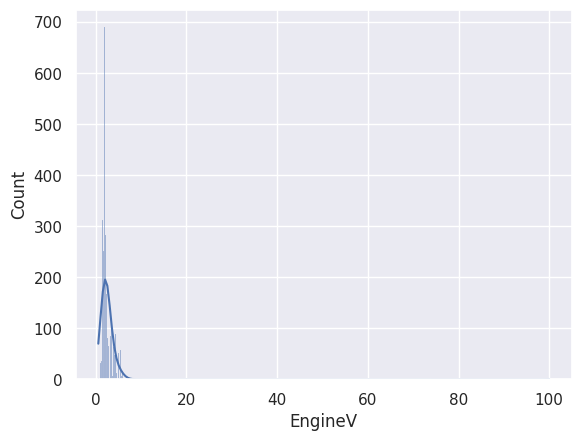

In [17]:
sns.histplot(data_no_mv['EngineV'], kde =True)

its rather strange ya nicha staright line chal rahi ha iss laptop ma nahi dikh rahi par ha yaha pa line
ya code likh ka check kar skata ha apan ki engine ka esa strange graph kyu aa raha ha


EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)


EngV.sort_values(by='EngineV')

In [18]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)



In [19]:

EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


last ma dekho 99.99 values aa rahi ha inha apan ko hatana ha jaise upar hata rahe ha

In [20]:
data_3 = data_2[data_2['EngineV']<6.5]

<AxesSubplot: xlabel='EngineV', ylabel='Count'>

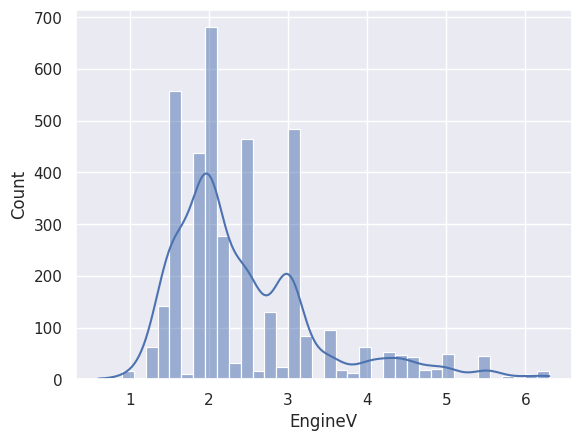

In [21]:
sns.histplot(data_3['EngineV'], kde=True)

<AxesSubplot: xlabel='Year', ylabel='Count'>

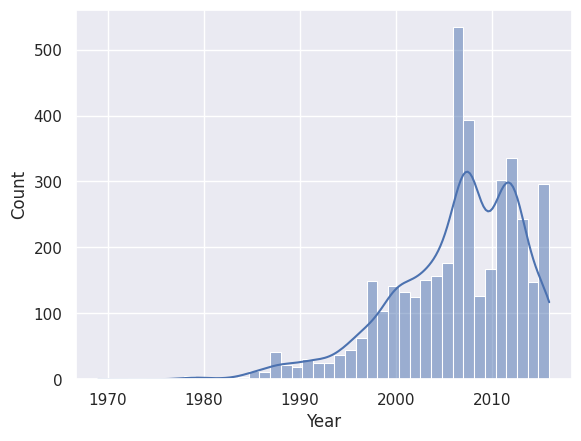

In [22]:
sns.histplot(data_no_mv['Year'], kde=True)

In [23]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']<q]

<AxesSubplot: xlabel='Year', ylabel='Count'>

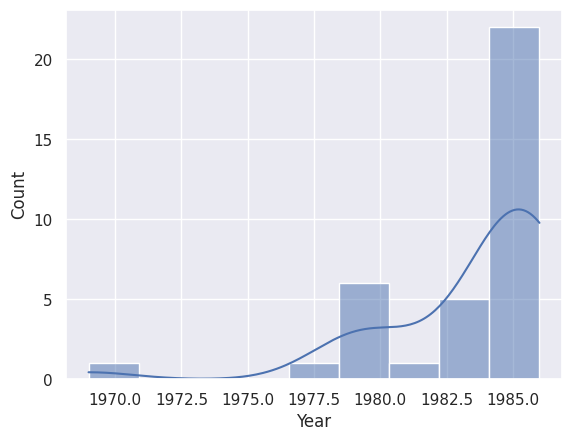

In [24]:
sns.histplot(data_4['Year'], kde=True)

In [25]:
data_cleaned = data_4.reset_index(drop=True)

In [26]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,36,36.000000,36,36.000000,36.000000,36,36,36.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,12,NaN,23,NaN,NaN,18,36,NaN
mean,NaN,3635.923611,NaN,189.055556,2.000000,NaN,NaN,1983.472222
std,NaN,5649.252518,NaN,119.727057,0.523723,NaN,NaN,3.525305
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1825.000000,NaN,107.500000,1.600000,NaN,NaN,1982.750000
50%,NaN,2250.000000,NaN,197.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3275.000000,NaN,283.250000,2.300000,NaN,NaN,1986.000000


## Checking the OLS assumptions

KeyError: 'Price'

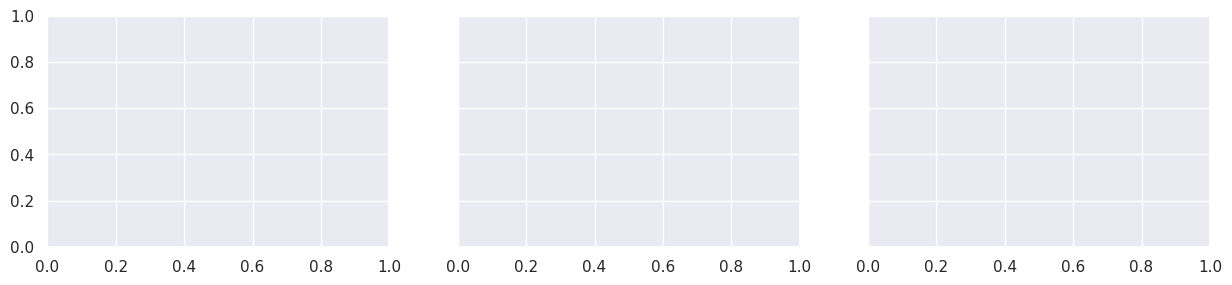

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [30]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

KeyError: "['Price'] not found in axis"